## Intro to pandas

In [1]:
## We load pandas as pd
import pandas as pd

In [2]:
## We run read_excel, and assign the result to a name
dataset = pd.read_excel("./example_data_mucoadhesive_polymers.xlsx")

## We run head, to see the top few rows (default 5)
dataset.head()

,Polymer,Class,Thiolation,TG,TG SD,pH,Prep,AT,AT SD,AT CoV,WA,WA SD,WA CoV
0,Carbopol 971P,Carbopol,not thiolated,0.0,0.0,3.00,lyo,7.2,0.6,8.333333,110.1,23.1,20.980926
1,Carbopol 971P,Carbopol,not thiolated,0.0,0.0,3.00,pr,5.5,0.8,14.545455,130.9,16.7,12.757830
2,Carbopol 971P,Carbopol,not thiolated,0.0,0.0,5.37,lyo,2.6,0.5,19.230769,43.2,6.4,14.814815
3,Carbopol 971P,Carbopol,not thiolated,0.0,0.0,7.00,lyo,3.1,0.4,12.903226,118.7,17.2,14.490312
4,Carbopol 971P,Carbopol,not thiolated,0.0,0.0,7.00,pr,7.2,0.6,8.333333,156.1,35.2,22.549648


In [3]:
## Look at the column names
dataset.columns

Index(['Polymer', 'Class', 'Thiolation', 'TG', 'TG SD', 'pH', 'Prep', 'AT',
       'AT SD', 'AT CoV', 'WA', 'WA SD', 'WA CoV'],
      dtype='object')

In [4]:
## Look at the index - in this case the index is a series of integers between 0 and 79, with a step of 1
## i.e. is the numbers 0-79.
dataset.index

RangeIndex(start=0, stop=79, step=1)

In [5]:
## Get the shape of the DataFrame (rows, columns)
dataset.shape

(79, 13)

In [6]:
## Describe the dataframe - this gives metrics for the numeric columns
dataset.describe()

,TG,TG SD,pH,AT,AT SD,AT CoV,WA,WA SD,WA CoV
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,119.549620,8.943544,5.323418,6.702911,0.843380,14.420395,175.270127,33.985063,20.312128
std,226.218623,18.736999,1.479736,8.642747,1.254024,12.613082,155.133484,44.955634,17.044060
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,8.300000,0.010000,0.014957
25%,0.000000,0.000000,4.000000,1.295000,0.180000,5.827703,74.200000,10.800000,11.277295
50%,0.000000,0.000000,5.370000,4.200000,0.430000,12.500000,130.900000,22.000000,14.814815
75%,95.700000,6.000000,7.000000,7.875000,0.900000,18.146027,208.100000,39.640000,24.767533
max,900.000000,65.900000,8.000000,52.750000,8.550000,65.306122,707.790000,242.520000,94.443630


In [7]:
## Take a look at the TG column
dataset["TG"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
      ...  
74     95.7
75     95.7
76     95.7
77     95.7
78    404.1
Name: TG, Length: 79, dtype: float64

In [8]:
## Take a look at row 1 (python starts from 0 not 1)
dataset.iloc[0]

Polymer       Carbopol 971P
Class              Carbopol
Thiolation    not thiolated
TG                      0.0
TG SD                   0.0
pH                      3.0
Prep                    lyo
AT                      7.2
AT SD                   0.6
AT CoV             8.333333
WA                    110.1
WA SD                  23.1
WA CoV            20.980926
Name: 0, dtype: object

## Intro to plotting with matplotlib

In [9]:
## we load the matplotlib library
import matplotlib
## we define "plt" as the "pyplot" function
import matplotlib.pyplot as plt

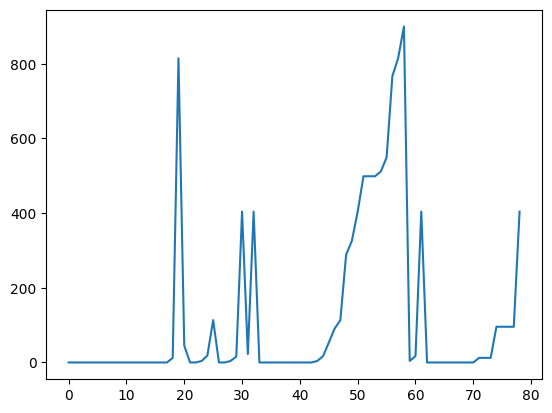

In [10]:
## Pass plt.plot the "TG" column of our dataset
plt.plot(dataset["TG"])
## This isnt always needed but it makes matplotlib show the graph below
plt.show()

## Pie Charts

In [11]:
## We add up all the different types of base polymer within the dataset
polymercount = dataset.groupby('Class').size()
polymercount

Class
Carbopol    22
PAA100       4
PAA2         2
PAA250       5
PAA45        2
PAA450      27
PCP         17
dtype: int64

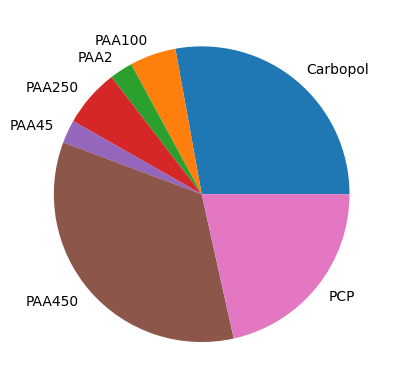

In [12]:
## We call the pie chart function of matplotlib and 
## give it the polymer counts, and tell it what the labels are
plt.pie(polymercount, labels= polymercount.index)
plt.show()

In [13]:
## This function turns the "Pastel2" colormap into a list (technically a tuple) of colors
## These are RGB values (red, green, blue)
plt.cm.Pastel2.colors

((0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.8, 0.8, 0.8))

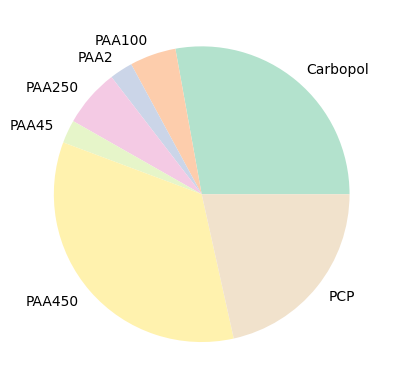

In [14]:
## We can change the colours by specifying one of matplotlib colormaps: 
## https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.pie(polymercount, labels= polymercount.index, colors=plt.cm.Pastel2.colors)
plt.show()

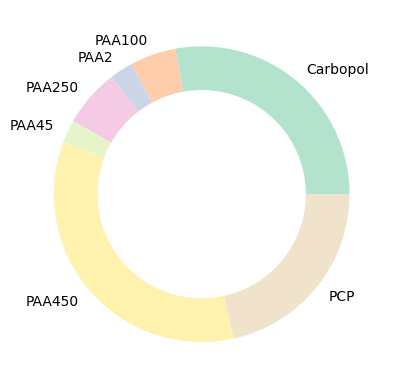

In [15]:
plt.pie(polymercount, labels= polymercount.index, colors=plt.cm.Pastel2.colors)

## Define a white circle of origin 0,0 and a radius 0.7
my_circle=plt.Circle( (0,0), 0.7, color='white')

## gcf stands for "get current figure"
p=plt.gcf()
## Add the circle to the current figure
p.gca().add_artist(my_circle)

plt.show()

## Bar charts

In [16]:
## We again use groupby to group the dataframe into base polymer types
## Then we take only the "TG" column and get the mean of it
dataset.groupby('Class')["TG"].mean()

Class
Carbopol     39.640909
PAA100       34.042500
PAA2        202.050000
PAA250       89.306000
PAA45       202.050000
PAA450      235.467407
PCP          48.458824
Name: TG, dtype: float64

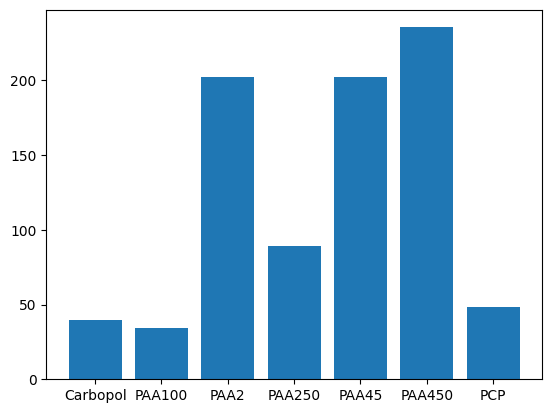

In [17]:
## We assign this to a new variable
grouped_basepolymer = dataset.groupby('Class')["TG"].mean()

## Pass this to the plt.bar function
plt.bar(x = grouped_basepolymer.index, height = grouped_basepolymer)
plt.show()

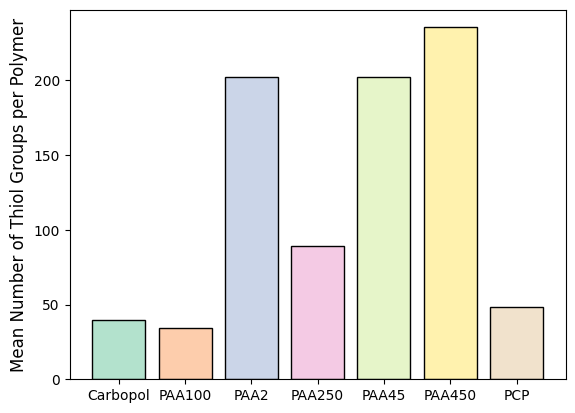

In [18]:
## Add a colour palette
plt.bar(x = grouped_basepolymer.index, height = grouped_basepolymer, color=plt.cm.Pastel2.colors,
## This line continues from the previous (because we didnt end the brackets above)
        ## lw is linewidth, edgecolor is ... edgecolor
        lw = 1, edgecolor = "k")

## Add a label to the y axis
plt.ylabel("Mean Number of Thiol Groups per Polymer", size = 12)
plt.show()

## Distribution plots

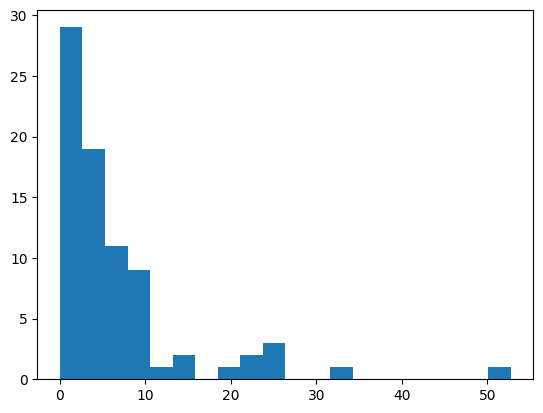

In [19]:
## Plot a histogram of the TG column, bins is how many bins to use
plt.hist(dataset["AT"], bins = 20)
plt.show()

In [20]:
import seaborn as sns

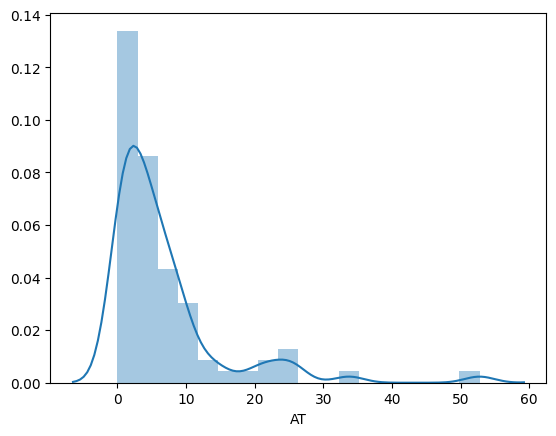

In [21]:
sns.distplot(dataset["AT"])
plt.show()

In [22]:
dataset["Class"] == "Carbopol"

0      True
1      True
2      True
3      True
4      True
      ...  
74    False
75    False
76    False
77    False
78    False
Name: Class, Length: 79, dtype: bool

In [23]:
dataset[dataset["Class"] == "Carbopol"]

,Polymer,Class,Thiolation,TG,TG SD,pH,Prep,AT,AT SD,AT CoV,WA,WA SD,WA CoV
0,Carbopol 971P,Carbopol,not thiolated,0.00,0.0,3.00,lyo,7.20,0.60,8.333333,110.10,23.10,20.980926
1,Carbopol 971P,Carbopol,not thiolated,0.00,0.0,3.00,pr,5.50,0.80,14.545455,130.90,16.70,12.757830
2,Carbopol 971P,Carbopol,not thiolated,0.00,0.0,5.37,lyo,2.60,0.50,19.230769,43.20,6.40,14.814815
3,Carbopol 971P,Carbopol,not thiolated,0.00,0.0,7.00,lyo,3.10,0.40,12.903226,118.70,17.20,14.490312
4,Carbopol 971P,Carbopol,not thiolated,0.00,0.0,7.00,pr,7.20,0.60,8.333333,156.10,35.20,22.549648
5,Carbopol 974P,Carbopol,not thiolated,0.00,0.0,3.00,lyo,8.20,0.30,3.658537,119.10,6.71,5.633921
6,Carbopol 974P,Carbopol,not thiolated,0.00,0.0,3.00,pr,6.80,0.70,10.294118,219.30,36.60,16.689466
7,Carbopol 974P,Carbopol,not thiolated,0.00,0.0,5.37,lyo,3.70,0.20,5.405405,53.90,6.10,11.317254
8,Carbopol 974P,Carbopol,not thiolated,0.00,0.0,7.00,lyo,4.60,0.50,10.869565,89.20,18.00,20.179372
9,Carbopol 974P,Carbopol,not thiolated,0.00,0.0,7.00,pr,10.30,0.90,8.737864,211.20,22.00,10.416667


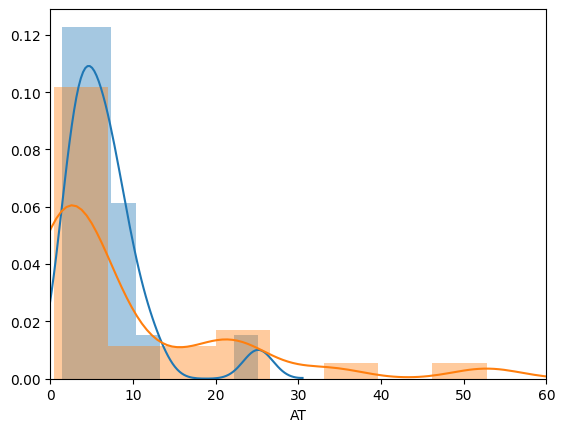

In [24]:
## Distribution 1
g = sns.distplot(dataset[dataset["Class"] == "Carbopol"]["AT"])
## Distribution 2
g2 = sns.distplot(dataset[dataset["Class"] == "PAA450"]["AT"])

g.set_xlim(0,60)
plt.show()

## Scatterplot

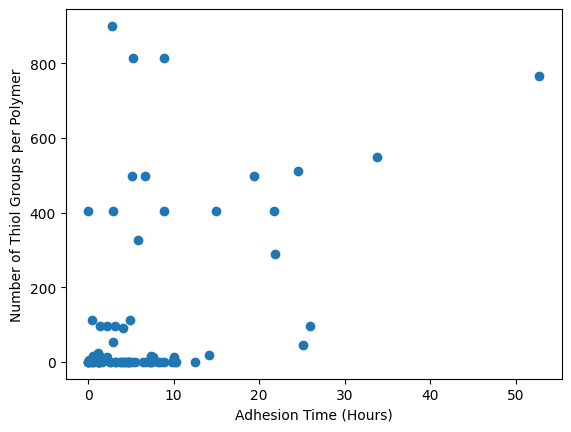

In [25]:
## Just pass two columns to plt.scatter
plt.scatter(dataset["AT"], dataset["TG"])

plt.xlabel("Adhesion Time (Hours)")
plt.ylabel("Number of Thiol Groups per Polymer")
plt.show()

## Boxplot

In [26]:
## We get only the columns with numeric values that we are interested in
dataset_shortened = dataset[["Class", "TG"]]

In [27]:
## Melt essentially "pivots" a dataframe - we choose a column of columns as identiers (ID)
## melt then converts the other columns into "variable/value pairs"
## This allows us to pass the "melted" dataframe to a function to plot boxplots
melted_data = dataset_shortened.melt(id_vars = "Class")

melted_data

,Class,variable,value
0,Carbopol,TG,0.0
1,Carbopol,TG,0.0
2,Carbopol,TG,0.0
3,Carbopol,TG,0.0
4,Carbopol,TG,0.0
...,...,...,...
74,PCP,TG,95.7
75,PCP,TG,95.7
76,PCP,TG,95.7
77,PCP,TG,95.7


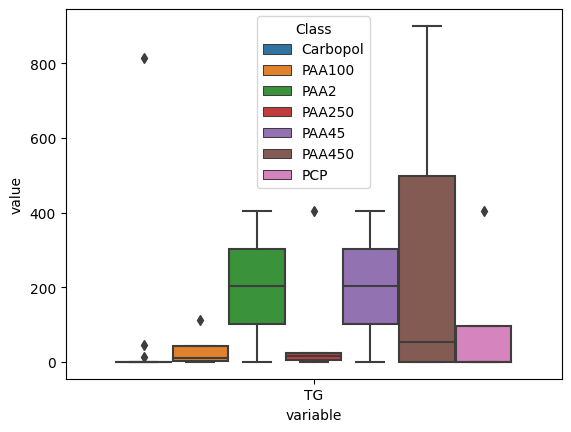

In [30]:
g = sns.boxplot(data = melted_data, x = "variable", y = "value", hue = "Class")
plt.show()

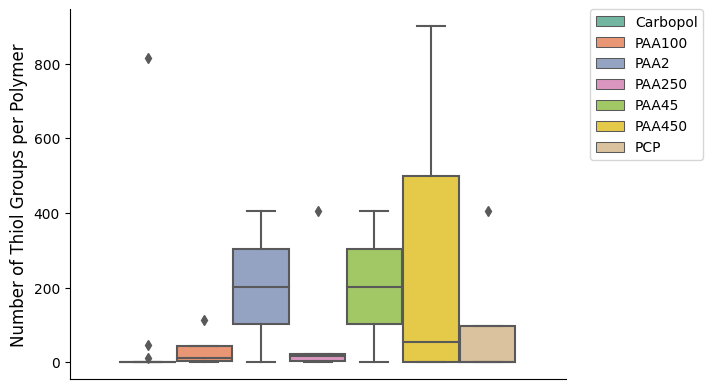

In [37]:
## Make the plot
g = sns.boxplot(data = melted_data, x = "variable", y = "value", hue = "Class", palette = "Set2")

## Set the x label and x ticks to be nothing (as we only have 1 group)
g.set_xlabel("")
g.set_xticklabels([""])
g.tick_params(bottom=False)  # remove the ticks

## Set the y label
g.set_ylabel("Number of Thiol Groups per Polymer", size = 12)

## Move the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## This removes the top and right borders
sns.despine()
plt.show()